<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout17_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #17 Indicator (or Dummy) Variables


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 17.1
Team Marketing Report is an organiztion that delivers actionable, measurable fan-centric sports business insights.  This organization has created a <strong>Fan Cost Index</strong> (FCI) which is a metric used to measure the cost of attending a sporting event.

Webpage: https://teammarketing.com/
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Variables in dataset:</li>
        <ul>
          <li>Sport: Baseball, Football, or Hockey {<strong>predictor #2</strong>}</li>
          <li>Team Name: Name of team</li>
          <li>Fan Cost Index (FCI) {<strong>Response</strong>}</li>
          <li>Seating: typical cost of a seat</li>
          <li>PremiumSeat: typical cost of a premium seat {<strong>predictor #1</strong>}</li>
          <li>Parking: typical cost of parking</li>
          <li>Program: typical cost of a program</li>
          <li>Cap: typical cost of a ball cap</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1uMYsjXZRDIXZ8T6LUHRzGOWXwfaF3nNx" width="75%",height="75%"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [64]:
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [65]:
# Reading data in using read_csv via tidyverse 
FanCostIndex <- read_csv("http://www.StatsClass.org/stat360/Datasets/FanCostIndex.csv")

Rows: 92 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Sport, Team
dbl (6): FCI, Seating, PremiumSeating, Parking, Program, Cap


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



A review of the first few lines of dataset.

In [66]:
#show the first few rows of data
head(FanCostIndex)

Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baseball,Arizona Diamondbacks,115.24,14.31,60.24,10,0,7
Baseball,Atlanta Braves,157.69,17.05,44.98,12,0,15
Baseball,Baltimore Orioles,172.18,23.42,42.86,8,5,15
Baseball,Boston Red Sox,334.78,52.32,100.85,27,5,20
Baseball,Chicago Cubs,329.74,52.56,256.98,25,5,20
Baseball,Chicago White Sox,249.60,38.65,94.24,23,4,13


In R, the data types of the predictors are important. Notice that Sport has a character (i.e. string) data type.  Generally speaking, the modeling rountines in R require that a variable be of a <strong>factor</strong> data type when used in a model.

In [67]:
str(FanCostIndex)

spec_tbl_df [92 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sport         : chr [1:92] "Baseball" "Baseball" "Baseball" "Baseball" ...
 $ Team          : chr [1:92] "Arizona Diamondbacks" "Atlanta Braves" "Baltimore Orioles" "Boston Red Sox" ...
 $ FCI           : num [1:92] 115 158 172 335 330 ...
 $ Seating       : num [1:92] 14.3 17.1 23.4 52.3 52.6 ...
 $ PremiumSeating: num [1:92] 60.2 45 42.9 100.8 257 ...
 $ Parking       : num [1:92] 10 12 8 27 25 23 12 12 8 5 ...
 $ Program       : num [1:92] 0 0 5 5 5 4 4 1 5 5 ...
 $ Cap           : num [1:92] 7 15 15 20 20 13 18 15 14 15 ...
 - attr(*, "spec")=
  .. cols(
  ..   Sport = col_character(),
  ..   Team = col_character(),
  ..   FCI = col_double(),
  ..   Seating = col_double(),
  ..   PremiumSeating = col_double(),
  ..   Parking = col_double(),
  ..   Program = col_double(),
  ..   Cap = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## Convert strings to factors

When building regression models in R, the  <strong>factor</strong> data type is necessary for non-numeric variables.  The following code will convert a string data type to factor data type.

In [68]:
FanCostIndex_Modeling <- ( FanCostIndex
                           %>% mutate(Sport = factor(Sport),
                                     )
                        )
str(FanCostIndex_Modeling)

spec_tbl_df [92 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sport         : Factor w/ 3 levels "Baseball","Football",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Team          : chr [1:92] "Arizona Diamondbacks" "Atlanta Braves" "Baltimore Orioles" "Boston Red Sox" ...
 $ FCI           : num [1:92] 115 158 172 335 330 ...
 $ Seating       : num [1:92] 14.3 17.1 23.4 52.3 52.6 ...
 $ PremiumSeating: num [1:92] 60.2 45 42.9 100.8 257 ...
 $ Parking       : num [1:92] 10 12 8 27 25 23 12 12 8 5 ...
 $ Program       : num [1:92] 0 0 5 5 5 4 4 1 5 5 ...
 $ Cap           : num [1:92] 7 15 15 20 20 13 18 15 14 15 ...
 - attr(*, "spec")=
  .. cols(
  ..   Sport = col_character(),
  ..   Team = col_character(),
  ..   FCI = col_double(),
  ..   Seating = col_double(),
  ..   PremiumSeating = col_double(),
  ..   Parking = col_double(),
  ..   Program = col_double(),
  ..   Cap = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


<table width='100%'><tr><td bgcolor="orange"><font size="+2">Using read.csv() </font></td></tr></table>


<u>**Note**</u>:  If the read.csv() function is used instead of read_csv() to read in the data, then the stringsAsFactors=TRUE argument can be included in to force non-numeric variables to be read in as factors.

In [69]:
# Reading data in using read.csv via base 
FanCostIndex_Modeling <- read.csv("http://www.StatsClass.org/stat360/Datasets/FanCostIndex.csv", stringsAsFactors = TRUE)

#Get the structure of the data.frame to ensure factor data types are specifed for SandType and ProjectileType
str(FanCostIndex_Modeling)

'data.frame':	92 obs. of  8 variables:
 $ Sport         : Factor w/ 3 levels "Baseball","Football",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Team          : Factor w/ 92 levels "Anaheim Ducks",..: 3 4 7 10 18 19 21 23 25 32 ...
 $ FCI           : num  115 158 172 335 330 ...
 $ Seating       : num  14.3 17.1 23.4 52.3 52.6 ...
 $ PremiumSeating: num  60.2 45 42.9 100.8 257 ...
 $ Parking       : num  10 12 8 27 25 23 12 12 8 5 ...
 $ Program       : num  0 0 5 5 5 4 4 1 5 5 ...
 $ Cap           : num  7 15 15 20 20 13 18 15 14 15 ...


<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

## Scatterplot of data

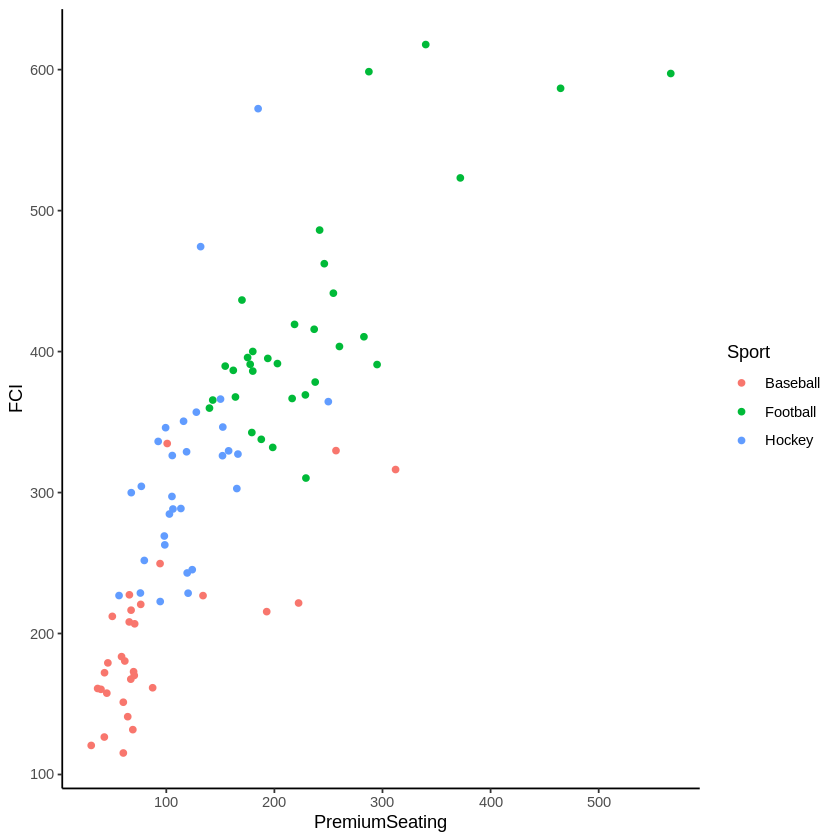

In [70]:
ggplot(data=FanCostIndex_Modeling, aes(x=PremiumSeating, y=FCI,col=Sport)) +
  geom_point() + 
  theme_classic()

## Simplification: Compare Football and Hockey Only

Let us first consider the comparison between two sports -- football and hockey.  Understanding the use of an indicator variable will be easier with only two sports.  All three sports will be considered near the end of this handout.

In [75]:
FootballHockeyFCI <- ( FanCostIndex_Modeling
                        %>% filter(Sport == 'Football' | Sport == 'Hockey')
                      )
#How many observations remain
dim(FootballHockeyFCI)

#Printing the first few rows
head(FootballHockeyFCI)

#Print the last few rows
tail(FootballHockeyFCI)

[1] 62  8

,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Football,Arizona Cardinals,366.72,67.69,216.42,10,3,19.99
2,Football,Atlanta Falcons,378.37,68.22,237.75,20,5,10.00
3,Football,Baltimore Ravens,486.19,86.92,241.84,35,0,24.00
4,Football,Buffalo Bills,337.75,59.19,187.87,25,0,16.00
5,Football,Carolina Panthers,342.58,66.17,179.13,20,0,9.95
6,Football,Chicago Bears,523.20,93.55,372.00,46,5,20.00


,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,Hockey,San Jose Sharks,288.33,45.71,106.15,21.00,5.00,15.00
58,Hockey,St.Louis Blues,245.28,40.57,123.99,15.00,1.00,10.00
59,Hockey,Tampa Bay Lightning,226.93,37.73,56.29,10.00,0.00,15.00
60,Hockey,Toronto Maple Leafs,572.32,115.96,184.94,18.64,4.66,20.51
61,Hockey,Vancouver Canucks,357.02,65.20,127.80,19.44,2.92,13.61
62,Hockey,Washington Capitals,327.29,55.57,166.27,20.00,5.00,18.00


Now, recreate the scatterplot of the relationship between PremimumSeating and FCI for Football and Hockey only.

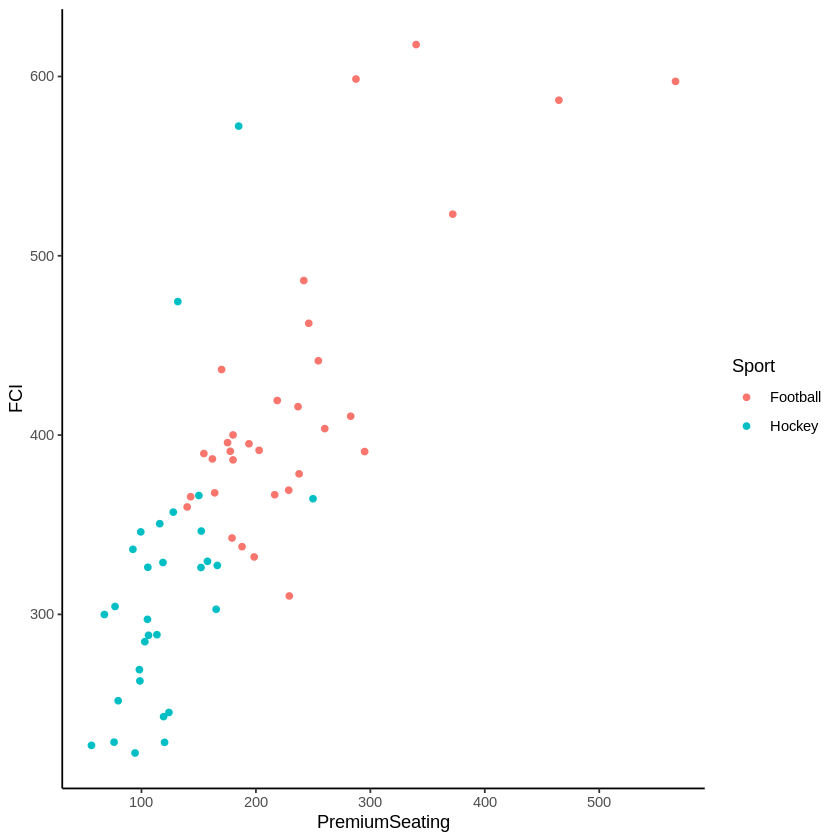

In [76]:
ggplot(data=FootballHockeyFCI, aes(x=PremiumSeating, y=FCI,col=Sport)) +
  geom_point() + 
  theme_classic()

## Fitting an Initial Model

Consider the following initial model that will be fit to this data.  The effect of $Sport$ is not being considered in this model.

$$
E(FCI | PremiumSeating) = \beta_{0} + \beta_{1} * PremiumSeating
$$

In [79]:
#Getting the initial model
Model_Initial <- lm(FCI ~ PremiumSeating, data=FootballHockeyFCI)

#Getting a summary of this model
summary(Model_Initial)


Call:
lm(formula = FCI ~ PremiumSeating, data = FootballHockeyFCI)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.460 -36.613   0.534  26.657 200.206 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    223.15176   16.22672   13.75  < 2e-16 ***
PremiumSeating   0.80546    0.08012   10.05 1.75e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.83 on 60 degrees of freedom
Multiple R-squared:  0.6275,	Adjusted R-squared:  0.6212 
F-statistic: 101.1 on 1 and 60 DF,  p-value: 1.752e-14


The following code provides a depiction of this model.  This model does seem to be doing a decent job of predicted Fan Cost Index.  However, this may be improved upon by considering $Sport$.

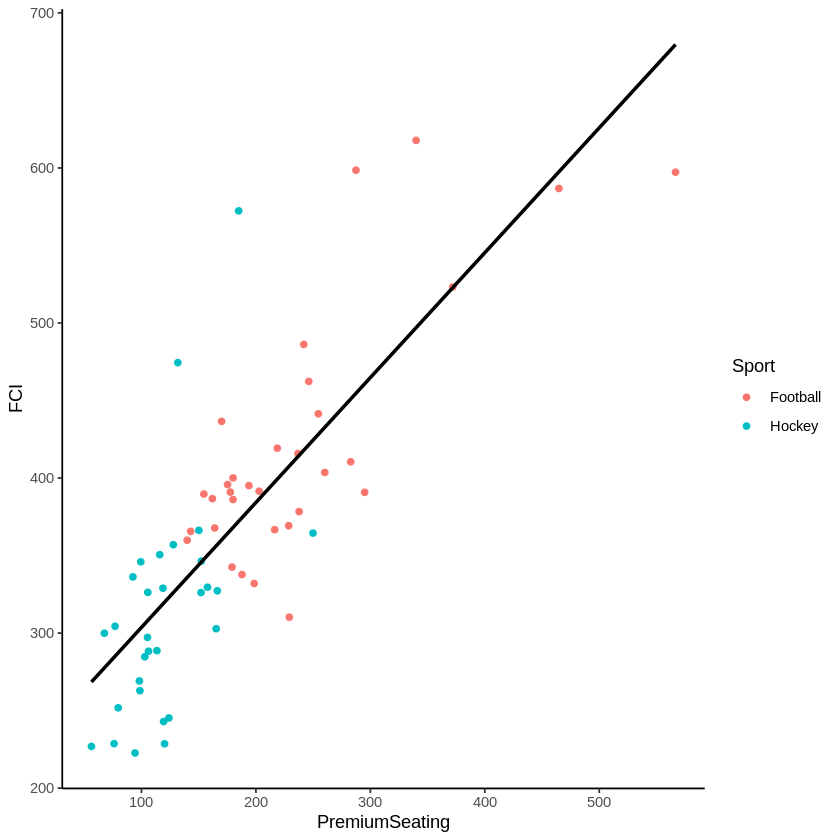

In [80]:
ggplot(data=FootballHockeyFCI) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  #specify aes() here to get two different colors for Sport
  geom_smooth(aes(x=PremiumSeating, y=FCI), method = "lm",formula = y~x, se=FALSE, col="black") +   #specify aes() here without Sport to get a single regression line
  theme_classic()

## Fitting a Model with an Indicator Variable (No Interaction Term)

Consider the following model in which $Sport$ has been added to the model.

$$
E(FCI | PremiumSeating, Sport) = \beta_{0} + \beta_{1} * PremiumSeating + \beta_{2} * Sport 
$$

where
$$
\begin{equation}
  Sport =
    \begin{cases}
      0 & for \; \text{Football}\\
      1 & for \; \text{Hockey}
    \end{cases}       
\end{equation}
$$

<u>Note</u>: When a predictor variable takes on an alternative form in a model, often the word <strong>term</strong> is used to identify the alternative form of the predictor in the model.

<table border='1'>
  <tr>
    <td align='center'>
    Sport as a <strong>Predictor</strong>
        \begin{equation}
              Sport =
                \begin{cases}
                   \text{Football} \\
                   \text{Hockey}
                \end{cases}       
            \end{equation}
    </td>
    <td align='center'>
    Sport as a <strong>Term</strong>
             \begin{equation}
              Sport =
                \begin{cases}
                  0 & for \; \text{Football}\\
                  1 & for \; \text{Hockey}
                \end{cases}       
            \end{equation}   
    </td>
  </tr>
</table>

Model for Sport = Football

$$
E(FCI | PremiumSeating, Sport=Football) = \beta_{0} + \beta_{1} * PremiumSeating
$$

Model for Sport = Hockey

$$
E(FCI | PremiumSeating, Sport = Hockey) = ( \beta_{0} + \beta_{2} ) + \beta_{1} * PremiumSeating 
$$

In R, the <strong>I()</strong> function can be used to specify an indicator variable when fitting a model.

In [132]:
#Fitting a model with an indicator variable for Sport
Model_Indicator <- lm(FCI ~ PremiumSeating + I(Sport), data=FootballHockeyFCI)

#Getting a summary of this model
summary(Model_Indicator)


Call:
lm(formula = FCI ~ PremiumSeating + I(Sport), data = FootballHockeyFCI)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.456  -39.444   -1.809   22.360  211.996 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    247.8043    26.5946   9.318 3.39e-13 ***
PremiumSeating   0.7284     0.1036   7.031 2.40e-09 ***
I(Sport)Hockey -22.1938    19.0029  -1.168    0.248    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.66 on 59 degrees of freedom
Multiple R-squared:  0.6359,	Adjusted R-squared:  0.6235 
F-statistic: 51.52 on 2 and 59 DF,  p-value: 1.14e-13


In [142]:
# Taking a look at how the model matrix is formed
cat("The X matrix for this model:")
model.matrix(Model_Indicator)[c(1:5, 57:62),]
cat("\n\n The FootballHockeyFCI data.frame:")
FootballHockeyFCI[c(1:5, 57:62),]

The X matrix for this model:

,(Intercept),PremiumSeating,I(Sport)Hockey
1,1,216.42,0
2,1,237.75,0
3,1,241.84,0
4,1,187.87,0
5,1,179.13,0
57,1,106.15,1
58,1,123.99,1
59,1,56.29,1
60,1,184.94,1
61,1,127.80,1




 The FootballHockeyFCI data.frame:

,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Football,Arizona Cardinals,366.72,67.69,216.42,10.00,3.00,19.99
2,Football,Atlanta Falcons,378.37,68.22,237.75,20.00,5.00,10.00
3,Football,Baltimore Ravens,486.19,86.92,241.84,35.00,0.00,24.00
4,Football,Buffalo Bills,337.75,59.19,187.87,25.00,0.00,16.00
5,Football,Carolina Panthers,342.58,66.17,179.13,20.00,0.00,9.95
57,Hockey,San Jose Sharks,288.33,45.71,106.15,21.00,5.00,15.00
58,Hockey,St.Louis Blues,245.28,40.57,123.99,15.00,1.00,10.00
59,Hockey,Tampa Bay Lightning,226.93,37.73,56.29,10.00,0.00,15.00
60,Hockey,Toronto Maple Leafs,572.32,115.96,184.94,18.64,4.66,20.51


Next, the predicted values will be obtained from this model.

In [171]:
#Getting the predicted values from this model
PredictedValues <- (FootballHockeyFCI
                    %>% mutate(Predicted_Indicator = predict(Model_Indicator, newdata=FootballHockeyFCI))
                   )
#Looking at this data.frame
head(PredictedValues)

,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap,Predicted_Indicator
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Football,Arizona Cardinals,366.72,67.69,216.42,10,3,19.99,406.3396
2,Football,Atlanta Falcons,378.37,68.22,237.75,20,5,10.00,420.9574
3,Football,Baltimore Ravens,486.19,86.92,241.84,35,0,24.00,423.7604
4,Football,Buffalo Bills,337.75,59.19,187.87,25,0,16.00,386.7739
5,Football,Carolina Panthers,342.58,66.17,179.13,20,0,9.95,380.7842
6,Football,Chicago Bears,523.20,93.55,372.00,46,5,20.00,512.9610


Create a scatterplot with the estimated regression lines.

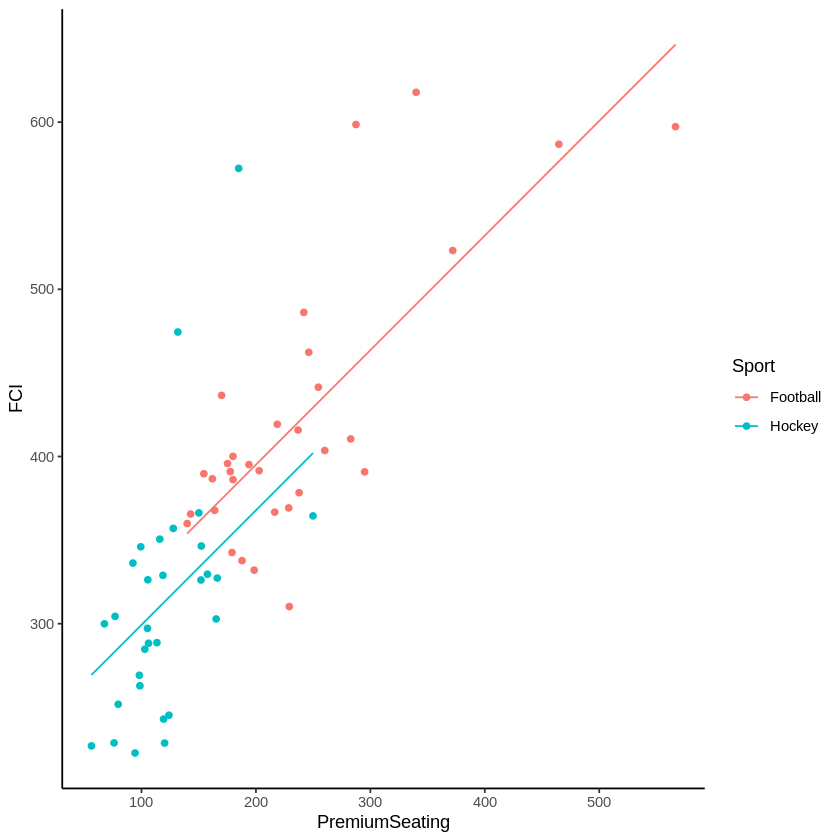

In [172]:
ggplot(data=PredictedValues) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  
  geom_line(aes(x=PremiumSeating, y=Predicted_Indicator, col=Sport)) +
  theme_classic()

## Fitting a Model with an Indicator Variable + Interaction Term

An <strong>interaction</strong> term, a term that combines two or more other terms, is used in this model.  The effect of including this interaction term in this model is that the slope for Football is allowed to be different than the slope for Hockey.


$$
E(FCI | PremiumSeating, Sport) = \beta_{0} + \beta_{1} * PremiumSeating + \beta_{2} * Sport + \beta_{3} * (PremiumSeating \times Sport)
$$

where, again, 
$$
\begin{equation}
  Sport =
    \begin{cases}
      0 & for \; \text{Football}\\
      1 & for \; \text{Hockey}
    \end{cases}       
\end{equation}
$$

Notice, when this model is used, the y-intercepts are allowed to be different and the slopes are allowed to be different. 

Model for Sport = Football

$$
E(FCI | PremiumSeating, Sport=Football) = \beta_{0} + \beta_{1} * PremiumSeating
$$

Model for Sport = Hockey

$$
E(FCI | PremiumSeating, Sport = Hockey) = ( \beta_{0} + \beta_{2} ) + ( \beta_{1} + \beta_{3} ) * PremiumSeating 
$$

The following code will fit this model.

In [151]:
#Fitting a model with an indicator variable + interaction term
Model_Indicator_withInteractionTerm <- lm(FCI ~ PremiumSeating + I(Sport) + PremiumSeating*I(Sport) , data=FootballHockeyFCI)

#Getting a summary of this model
summary(Model_Indicator_withInteractionTerm)


Call:
lm(formula = FCI ~ PremiumSeating + I(Sport) + PremiumSeating * 
    I(Sport), data = FootballHockeyFCI)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.836  -39.412   -1.925   21.900  194.154 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   259.1758    28.4401   9.113 8.63e-13 ***
PremiumSeating                  0.6805     0.1120   6.075 1.03e-07 ***
I(Sport)Hockey                -66.7747    44.3219  -1.507    0.137    
PremiumSeating:I(Sport)Hockey   0.3240     0.2911   1.113    0.270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.54 on 58 degrees of freedom
Multiple R-squared:  0.6435,	Adjusted R-squared:  0.625 
F-statistic:  34.9 on 3 and 58 DF,  p-value: 5.1e-13


Once again, taking a look at the form of the indicator and interaction terms in the $X$ matrix used to fit this data.

In [148]:
# Taking a look at how the model matrix is formed
cat("The X matrix for this model:")
model.matrix(Model_Indicator_withInteractionTerm)[c(1:5, 57:62),]
cat("\n\n The FootballHockeyFCI data.frame:")
FootballHockeyFCI[c(1:5, 57:62),]

The X matrix for this model:

,(Intercept),PremiumSeating,I(Sport)Hockey,PremiumSeating:I(Sport)Hockey
1,1,216.42,0,0.00
2,1,237.75,0,0.00
3,1,241.84,0,0.00
4,1,187.87,0,0.00
5,1,179.13,0,0.00
57,1,106.15,1,106.15
58,1,123.99,1,123.99
59,1,56.29,1,56.29
60,1,184.94,1,184.94
61,1,127.80,1,127.80




 The FootballHockeyFCI data.frame:

,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Football,Arizona Cardinals,366.72,67.69,216.42,10.00,3.00,19.99
2,Football,Atlanta Falcons,378.37,68.22,237.75,20.00,5.00,10.00
3,Football,Baltimore Ravens,486.19,86.92,241.84,35.00,0.00,24.00
4,Football,Buffalo Bills,337.75,59.19,187.87,25.00,0.00,16.00
5,Football,Carolina Panthers,342.58,66.17,179.13,20.00,0.00,9.95
57,Hockey,San Jose Sharks,288.33,45.71,106.15,21.00,5.00,15.00
58,Hockey,St.Louis Blues,245.28,40.57,123.99,15.00,1.00,10.00
59,Hockey,Tampa Bay Lightning,226.93,37.73,56.29,10.00,0.00,15.00
60,Hockey,Toronto Maple Leafs,572.32,115.96,184.94,18.64,4.66,20.51


Getting the predicted values form the model that includes the interaction term.

In [173]:
PredictedValues <- (PredictedValues
                    %>% mutate(Predicted_Interaction = predict(Model_Indicator_withInteractionTerm, newdata=FootballHockeyFCI))
                   )
head(PredictedValues)


,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap,Predicted_Indicator,Predicted_Interaction
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Football,Arizona Cardinals,366.72,67.69,216.42,10,3,19.99,406.3396,406.4401
2,Football,Atlanta Falcons,378.37,68.22,237.75,20,5,10.00,420.9574,420.9543
3,Football,Baltimore Ravens,486.19,86.92,241.84,35,0,24.00,423.7604,423.7373
4,Football,Buffalo Bills,337.75,59.19,187.87,25,0,16.00,386.7739,387.0131
5,Football,Carolina Panthers,342.58,66.17,179.13,20,0,9.95,380.7842,381.0659
6,Football,Chicago Bears,523.20,93.55,372.00,46,5,20.00,512.9610,512.3055


The updated scatterplot is shown here.  The model with the interaction terms allows the y-intercepts and slopes for the two different lines.

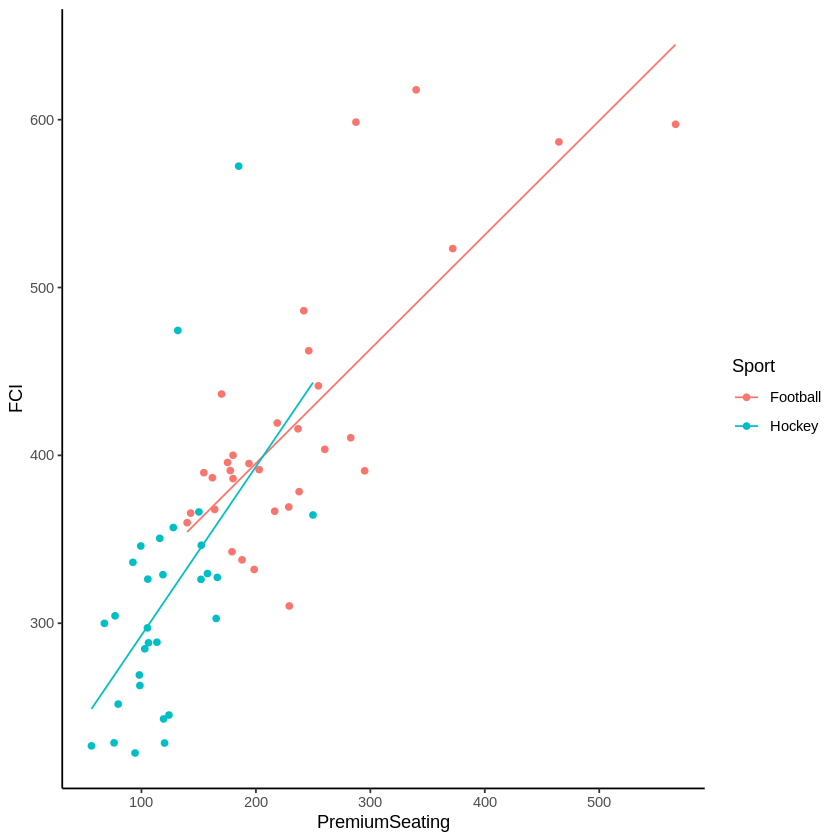

In [174]:
ggplot(data=PredictedValues) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  
  geom_line(aes(x=PremiumSeating, y=Predicted_Interaction, col=Sport)) +
  theme_classic()

Next, let's add the regression line from the initial model (where the Sport is not considered).

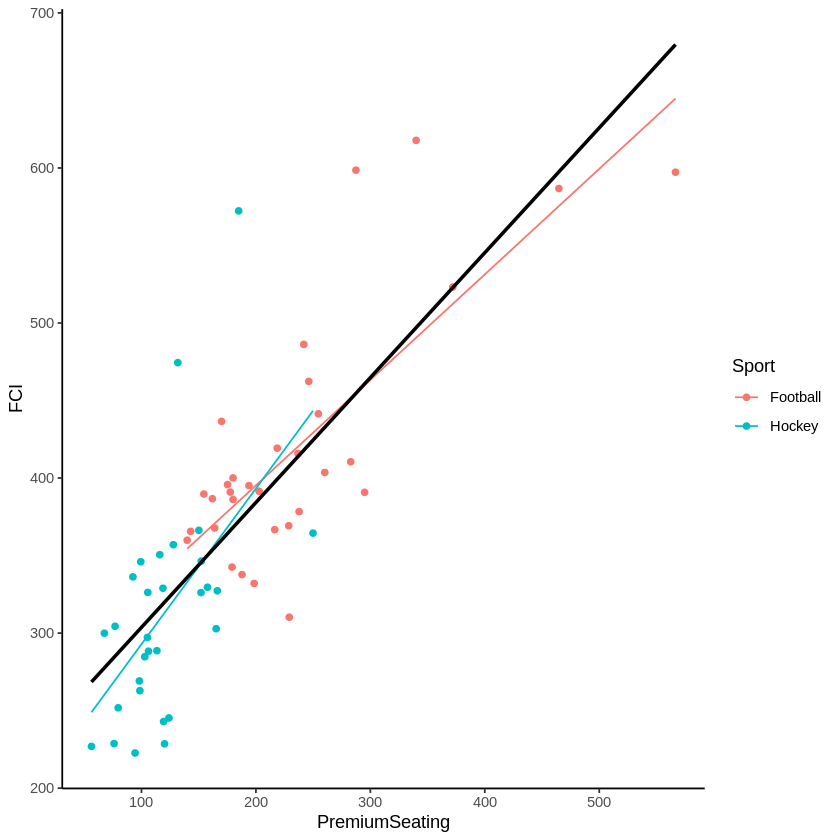

In [175]:
ggplot(data=PredictedValues) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  
  geom_line(aes(x=PremiumSeating, y=Predicted_Interaction, col=Sport)) +
  geom_smooth(aes(x=PremiumSeating, y=FCI), method = "lm",formula = y~x, se=FALSE, col="black") +   #what does a single line look like?
  theme_classic()

There does not appear to be much difference between the two seperate regression lines and the single regression line when the $Sport$ is excluded.  Also, a quick review of the p-values suggests that the interaction term does not appear to be needed, nor does the indicator variable.

In [160]:
summary(Model_Indicator_withInteractionTerm)


Call:
lm(formula = FCI ~ PremiumSeating + I(Sport) + PremiumSeating * 
    I(Sport), data = FootballHockeyFCI)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.836  -39.412   -1.925   21.900  194.154 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   259.1758    28.4401   9.113 8.63e-13 ***
PremiumSeating                  0.6805     0.1120   6.075 1.03e-07 ***
I(Sport)Hockey                -66.7747    44.3219  -1.507    0.137    
PremiumSeating:I(Sport)Hockey   0.3240     0.2911   1.113    0.270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.54 on 58 degrees of freedom
Multiple R-squared:  0.6435,	Adjusted R-squared:  0.625 
F-statistic:  34.9 on 3 and 58 DF,  p-value: 5.1e-13


## The Final Model for Comparing Football to Hockey

In [161]:
summary(Model_Initial)


Call:
lm(formula = FCI ~ PremiumSeating, data = FootballHockeyFCI)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.460 -36.613   0.534  26.657 200.206 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    223.15176   16.22672   13.75  < 2e-16 ***
PremiumSeating   0.80546    0.08012   10.05 1.75e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.83 on 60 degrees of freedom
Multiple R-squared:  0.6275,	Adjusted R-squared:  0.6212 
F-statistic: 101.1 on 1 and 60 DF,  p-value: 1.752e-14


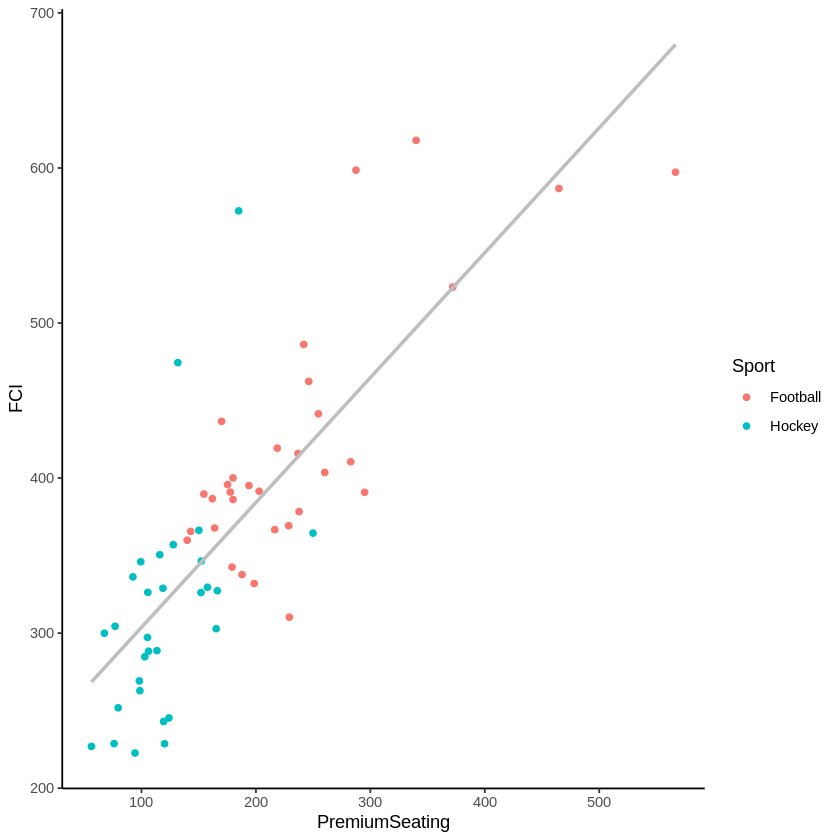

In [176]:
ggplot(data=PredictedValues) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  
  geom_smooth(aes(x=PremiumSeating, y=FCI), method = "lm",formula = y~x, se=FALSE, col="gray") +   
  theme_classic()

## Comparing All Three Sports -- Baseball, Football, and Hockey

The following model represents the extention for including all three sports.  This model includes <strong>two</strong> indicator variables and their associated interaction terms.

$$
\begin{array}{rcl}
E(FCI | PremiumSeating, Sport) & =  & \beta_{0} + \beta_{1} * PremiumSeating \\  
& & + \beta_{2} * SportI + \beta_{3} * SportII \\ 
& & + \beta_{4} * (PremiumSeating \times SportI ) + \beta_{5} * (PremiumSeating \times SportII )\end{array}
$$

where, 
$$
\begin{equation}
  SportI =
    \begin{cases}
      1 & for \; \text{Football}\\
      0 & for \; \text{Hockey}
    \end{cases}       
\end{equation}
$$

and
$$
\begin{equation}
  SportII =
    \begin{cases}
      0 & for \; \text{Football}\\
      1 & for \; \text{Hockey}
    \end{cases}       
\end{equation}
$$

<u>Note</u>: Baseball is represented by $SportI=0$ and $SportII=0$. If a categorical variable has $l$ levels, $l-1$ indicators variables must be created and used in the model.

Model for Sport = Baseball [$SportI = 0 \, and \, SportII = 0$]

$$
\begin{array}{rcl}
E(FCI | PremiumSeating, Sport = Baseball) & =  & \beta_{0} + \beta_{1} * PremiumSeating \end{array}
$$

Model for Sport = Football [$SportI = 1 \, and \, SportII = 0$]

$$
\begin{array}{rcl}
E(FCI | PremiumSeating, Sport = Football) & =  & (\beta_{0} + \beta_{2}) + (\beta_{1} + \beta_{4})* PremiumSeating \end{array}
$$

Model for Sport = Hockey [$SportI = 0 \, and \, SportII = 1$]

$$
\begin{array}{rcl}
E(FCI | PremiumSeating, Sport = Hockey) & =  & (\beta_{0} + \beta_{3}) + (\beta_{1} + \beta_{5})* PremiumSeating \end{array}
$$

Getting the scatterplot for all three levels.

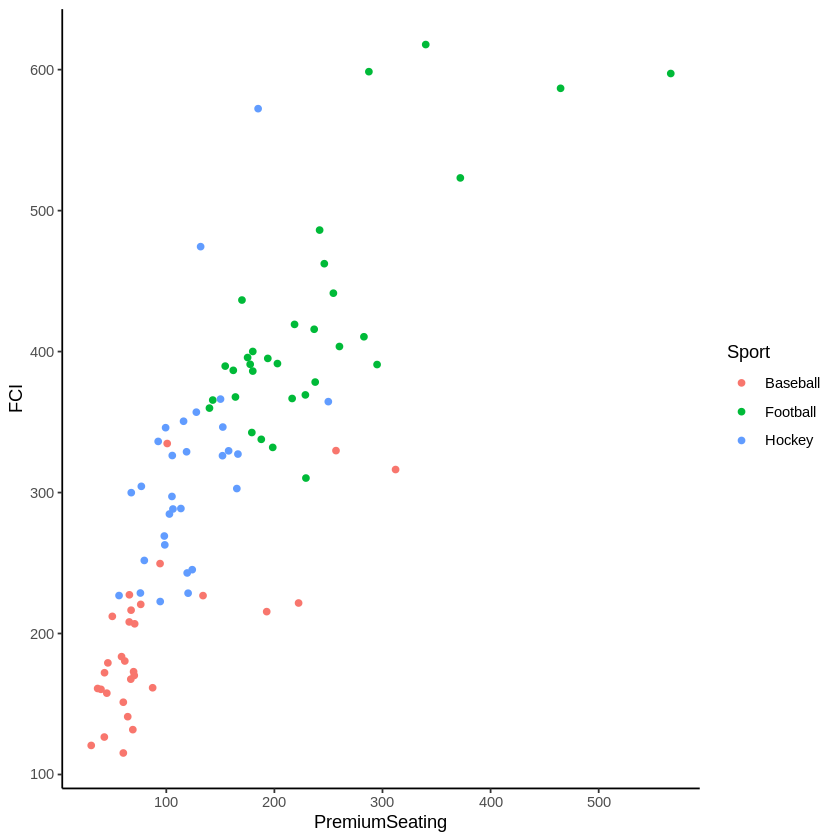

In [162]:
ggplot(data=FanCostIndex_Modeling, aes(x=PremiumSeating, y=FCI,col=Sport)) +
  geom_point() + 
  theme_classic()

In [163]:
#Fitting a model with an indicator variable for three sports an the associated interaction terms
Model_Indicator_withInteractionTerms <- lm(FCI ~ PremiumSeating + I(Sport) + PremiumSeating*I(Sport) , data=FanCostIndex_Modeling)

#Getting a summary of this model
summary(Model_Indicator_withInteractionTerms)


Call:
lm(formula = FCI ~ PremiumSeating + I(Sport) + PremiumSeating * 
    I(Sport), data = FanCostIndex_Modeling)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.836  -38.704   -3.007   23.638  194.154 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     142.66097   15.98806   8.923 7.06e-14 ***
PremiumSeating                    0.58609    0.14384   4.075 0.000102 ***
I(Sport)Football                116.51480   30.58771   3.809 0.000261 ***
I(Sport)Hockey                   49.74007   35.03033   1.420 0.159248    
PremiumSeating:I(Sport)Football   0.09437    0.17674   0.534 0.594775    
PremiumSeating:I(Sport)Hockey     0.41837    0.28531   1.466 0.146197    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.76 on 86 degrees of freedom
Multiple R-squared:  0.8076,	Adjusted R-squared:  0.7964 
F-statistic: 72.18 on 5 and 86 DF,  p-value: < 2.2e-16


Taking a look at the form of the indicator variable when all three sports are included and their associated interaction terms in the $X$ matrix used to fit this data.

In [165]:
# Taking a look at how the model matrix is formed
cat("The X matrix for this model:")
model.matrix(Model_Indicator_withInteractionTerms)[c(1:5, 31:35, 87:92),]
cat("\n\n The FanCostIndex_Modeling data.frame:")
FanCostIndex_Modeling[c(1:5, 31:35, 87:92),]

The X matrix for this model:

,(Intercept),PremiumSeating,I(Sport)Football,I(Sport)Hockey,PremiumSeating:I(Sport)Football,PremiumSeating:I(Sport)Hockey
1,1,60.24,0,0,0.00,0.00
2,1,44.98,0,0,0.00,0.00
3,1,42.86,0,0,0.00,0.00
4,1,100.85,0,0,0.00,0.00
5,1,256.98,0,0,0.00,0.00
31,1,216.42,1,0,216.42,0.00
32,1,237.75,1,0,237.75,0.00
33,1,241.84,1,0,241.84,0.00
34,1,187.87,1,0,187.87,0.00
35,1,179.13,1,0,179.13,0.00




 The FanCostIndex_Modeling data.frame:

,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Baseball,Arizona Diamondbacks,115.24,14.31,60.24,10.00,0.00,7.00
2,Baseball,Atlanta Braves,157.69,17.05,44.98,12.00,0.00,15.00
3,Baseball,Baltimore Orioles,172.18,23.42,42.86,8.00,5.00,15.00
4,Baseball,Boston Red Sox,334.78,52.32,100.85,27.00,5.00,20.00
5,Baseball,Chicago Cubs,329.74,52.56,256.98,25.00,5.00,20.00
31,Football,Arizona Cardinals,366.72,67.69,216.42,10.00,3.00,19.99
32,Football,Atlanta Falcons,378.37,68.22,237.75,20.00,5.00,10.00
33,Football,Baltimore Ravens,486.19,86.92,241.84,35.00,0.00,24.00
34,Football,Buffalo Bills,337.75,59.19,187.87,25.00,0.00,16.00


Getting the predicted values so they can be plotted below.

In [166]:
PredictedValues <- (FanCostIndex_Modeling
                    %>% mutate(Predicted_Interaction = predict(Model_Indicator_withInteractionTerms, newdata=FanCostIndex_Modeling))
                   )
head(PredictedValues)


,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap,Predicted_Interaction
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Baseball,Arizona Diamondbacks,115.24,14.31,60.24,10,0,7,177.9670
2,Baseball,Atlanta Braves,157.69,17.05,44.98,12,0,15,169.0233
3,Baseball,Baltimore Orioles,172.18,23.42,42.86,8,5,15,167.7807
4,Baseball,Boston Red Sox,334.78,52.32,100.85,27,5,20,201.7681
5,Baseball,Chicago Cubs,329.74,52.56,256.98,25,5,20,293.2741
6,Baseball,Chicago White Sox,249.60,38.65,94.24,23,4,13,197.8940


Creating the scatterplot with the three different regression lines.

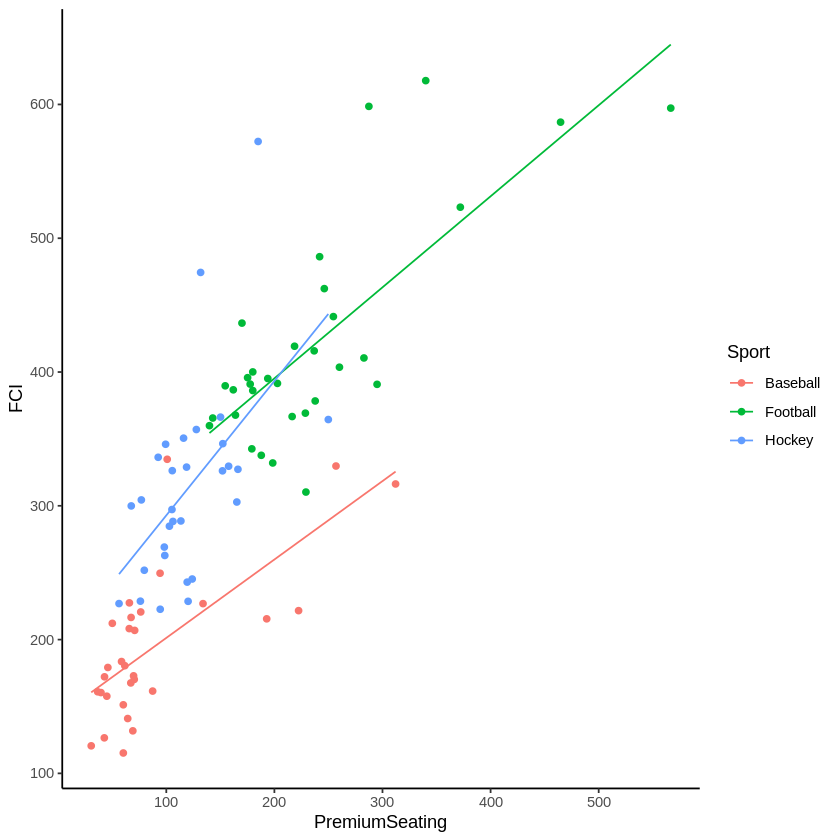

In [128]:
ggplot(data=PredictedValues) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  
  geom_line(aes(x=PremiumSeating, y=Predicted_Interaction, col=Sport)) +
  theme_classic()

The three regression lines appear to have somewhat similar slopes.  This is evident when considering the individual p-values for the interaction terms.

In [167]:
#Getting a summary of this model
summary(Model_Indicator_withInteractionTerms)


Call:
lm(formula = FCI ~ PremiumSeating + I(Sport) + PremiumSeating * 
    I(Sport), data = FanCostIndex_Modeling)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.836  -38.704   -3.007   23.638  194.154 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     142.66097   15.98806   8.923 7.06e-14 ***
PremiumSeating                    0.58609    0.14384   4.075 0.000102 ***
I(Sport)Football                116.51480   30.58771   3.809 0.000261 ***
I(Sport)Hockey                   49.74007   35.03033   1.420 0.159248    
PremiumSeating:I(Sport)Football   0.09437    0.17674   0.534 0.594775    
PremiumSeating:I(Sport)Hockey     0.41837    0.28531   1.466 0.146197    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.76 on 86 degrees of freedom
Multiple R-squared:  0.8076,	Adjusted R-squared:  0.7964 
F-statistic: 72.18 on 5 and 86 DF,  p-value: < 2.2e-16


The <strong>anova()</strong> function can be used to conduct a <font size="+10">BIG</font> F-test to determine if the interactions terms are useful.

$$
\begin{array}{rcl}
H_O : & \beta_{4} = 0 \mbox{ and } \beta_{5} = 0 \\
H_A: & \mbox{At least one is non-zero}\end{array}
$$

In [129]:
anova(Model_Indicator_withInteractionTerms)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PremiumSeating,1,817000.527,817000.527,293.521462,1.836805e-29
I(Sport),2,181579.452,90789.726,32.617767,2.872884e-11
PremiumSeating:I(Sport),2,6000.338,3000.169,1.077862,3.448745e-01
Residuals,86,239376.176,2783.444,NA,NA


The p-value for PremiumSeating:I(Sport) is 0.3449 which is not less than 0.05; thus, we fail to reject Ho.  Conclude that the interaction terms are not needed.

## Fitting a model with No Interaction Terms

$$
\begin{array}{rcl}
E(FCI | PremiumSeating, Sport) & =  & \beta_{0} + \beta_{1} * PremiumSeating \\  
& & + \beta_{2} * SportI + \beta_{3} * SportII \\ 
\end{array}
$$

In [168]:
#Fitting a model with an indicator variable only for the three sports
Model_Indicator <- lm(FCI ~ PremiumSeating + I(Sport) , data=FanCostIndex_Modeling)

#Getting a summary of this model
summary(Model_Indicator)


Call:
lm(formula = FCI ~ PremiumSeating + I(Sport), data = FanCostIndex_Modeling)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.797  -36.640   -1.597   21.368  214.782 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      133.85812   11.93083  11.220  < 2e-16 ***
PremiumSeating     0.68532    0.07923   8.650 2.15e-13 ***
I(Sport)Football 124.16550   17.84054   6.960 5.82e-10 ***
I(Sport)Hockey    96.93767   13.86199   6.993 5.00e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.81 on 88 degrees of freedom
Multiple R-squared:  0.8027,	Adjusted R-squared:  0.796 
F-statistic: 119.4 on 3 and 88 DF,  p-value: < 2.2e-16


Getting the predicted values from the model that includes only the indicator variable.

In [169]:
PredictedValues <- (PredictedValues
                    %>% mutate(Predicted_Indicator = predict(Model_Indicator, newdata=FanCostIndex_Modeling))
                   )
head(PredictedValues)


,Sport,Team,FCI,Seating,PremiumSeating,Parking,Program,Cap,Predicted_Interaction,Predicted_Indicator
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Baseball,Arizona Diamondbacks,115.24,14.31,60.24,10,0,7,177.9670,175.1415
2,Baseball,Atlanta Braves,157.69,17.05,44.98,12,0,15,169.0233,164.6836
3,Baseball,Baltimore Orioles,172.18,23.42,42.86,8,5,15,167.7807,163.2307
4,Baseball,Boston Red Sox,334.78,52.32,100.85,27,5,20,201.7681,202.9722
5,Baseball,Chicago Cubs,329.74,52.56,256.98,25,5,20,293.2741,309.9705
6,Baseball,Chicago White Sox,249.60,38.65,94.24,23,4,13,197.8940,198.4423


Creating the scatterplot with the predicted values from the model that includes only the indicator for the three sports.

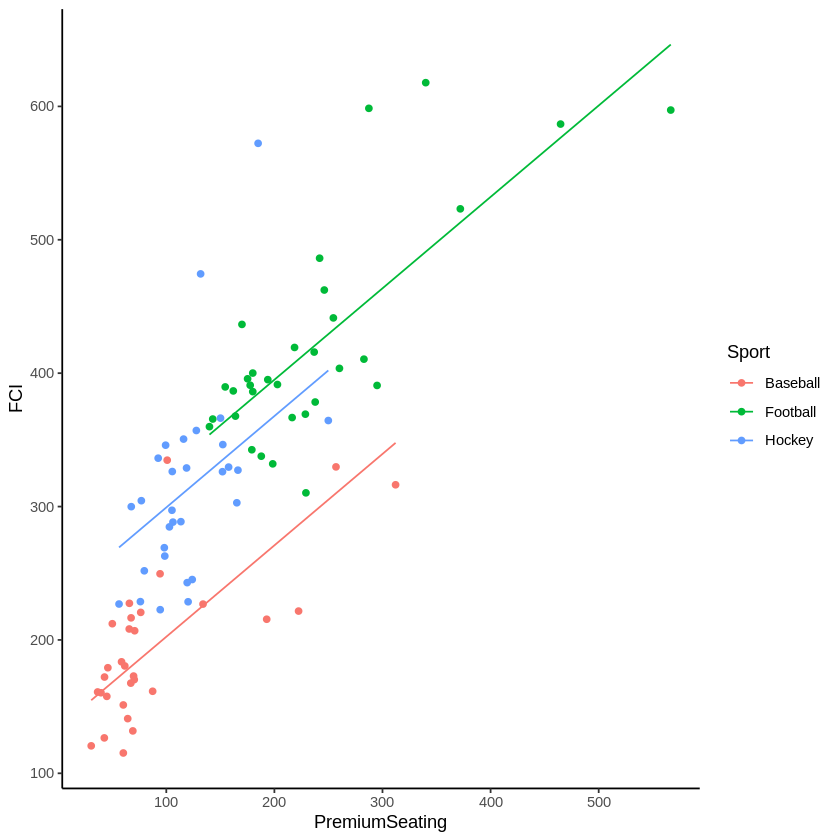

In [170]:
ggplot(data=PredictedValues) +
  geom_point(aes(x=PremiumSeating, y=FCI,col=Sport)) +  
  geom_line(aes(x=PremiumSeating, y=Predicted_Indicator, col=Sport)) +
  theme_classic()

In [130]:
BIC(Model_Indicator, Model_Indicator_withInteractionTerms)

,df,BIC
,<dbl>,<dbl>
Model_Indicator,5,1009.460
Model_Indicator_withInteractionTerms,7,1016.225




---



---

End of Document